<a href="https://colab.research.google.com/github/decouflet/7506R-2C2022-GRUPO15/blob/main/TP1_orga_del_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP1

In [3]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

In [5]:
import pandas as pd

properati = pd.read_csv('./properati_argentina_2021.csv')

In [3]:
properati.shape

(460154, 20)

Hay 460154 filas y 20 columnas

In [4]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Mostramos un poco de informacion en general del dataset

In [5]:
properati.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Estos son los tipos de las 20 columnas

In [6]:
properati.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64

Vemos que hay filas con datos faltantes

In [7]:

properati_casa_depto = properati[properati.property_type.isin(['Casa', 'PH','Departamento'])]
properati_zona = properati_casa_depto[properati_casa_depto.place_l2.isin(['Capital Federal'])]
properati_operacion = properati_zona[properati_zona.operation.isin(['Venta'])]
properati_limpio = properati_operacion[properati_operacion.property_currency.isin(['USD'])]
properati_limpio.shape

(94249, 20)

Realizamos filtrado por:
    -Tipo de propiedad
    -Zona, que corresponda a capital
    -Tipo de Operacion
    -Tipo de moneda
Tomamos en cuenta que es excluyente que los datos no tengan datos faltantes para realizar este primer filtro
Vemos que el dataframe reduce su tamaño

In [8]:
#CON ESTE COMANDO SE GUARDA
#properati_limpio2 = pd.DataFrame(properati_limpio)
#properati_limpio2.to_csv('properatilimpio.csv',index = False)

            latitud      longitud  place_l6  property_rooms  \
count  90519.000000  90519.000000       0.0    93205.000000   
mean     -34.591481    -58.449795       NaN        2.822799   
std        0.181719      0.292630       NaN        1.426148   
min      -53.788624    -71.471192       NaN        1.000000   
25%      -34.615975    -58.466522       NaN        2.000000   
50%      -34.595790    -58.439000       NaN        3.000000   
75%      -34.577413    -58.408862       NaN        4.000000   
max      -24.219827    -54.133330       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       83262.000000            89405.000000              90895.000000   
mean            2.014629              109.092970                 87.931932   
std             1.129767              980.401976                990.927129   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.

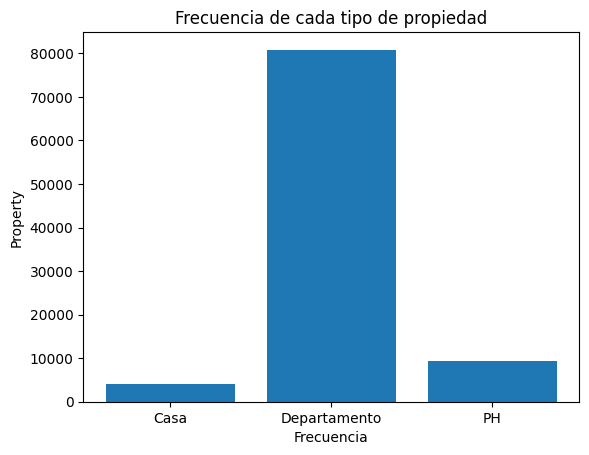

In [28]:
properati_limpio.dtypes

print(properati_limpio.describe())
#Medidas de resumen de las variables cuantitativas continuas 

ds_agrupado_property_type=properati_limpio.groupby(['property_type']).count()  #Calculo la frecuencia de cada tipo de propiedad

eje_y = ds_agrupado_property_type["id"].tolist() # Tomamos del ds de tipos de propiedad la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_property_type.index.tolist() # Tomamos todos los tipos de propiedades

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y) # Creamos Gráfica

plt.ylabel('Property')
plt.xlabel('Frecuencia') 
plt.title('Frecuencia de cada tipo de propiedad')
 
plt.show()

Vemos que las columas *start_date, end_date y created_on* son tipo OBJECT, lo cual decidimos pasarlo a su tipo de dato correspondiente el cual es *datetime*

In [10]:
#properati_limpio['start_date'].unique().size
#properati2 = pd.to_datetime(properati_limpio['start_date'])
#properati2.unique()

In [11]:
from sklearn.model_selection import train_test_split

train_set, train_test = train_test_split(properati_limpio, test_size = 0.2, random_state = 1)
